In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

C:\Users\User1\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User1\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User1\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User1\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

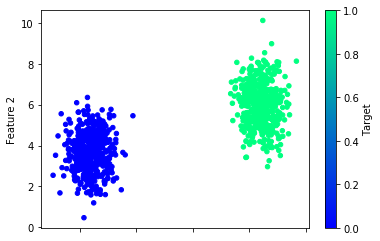

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Data is ready - Create the Keras Sequential model for neural network model
# this model stores the entire network created
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# Add the output layer that uses a probability activation function
# classification output
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 426us/sample - loss: 0.8004 - acc: 0.3080
Epoch 2/100
750/750 [==============================] - 0s 97us/sample - loss: 0.7861 - acc: 0.2960
Epoch 3/100
750/750 [==============================] - 0s 107us/sample - loss: 0.7733 - acc: 0.3107
Epoch 4/100
750/750 [==============================] - 0s 87us/sample - loss: 0.7620 - acc: 0.3267
Epoch 5/100
750/750 [==============================] - 0s 97us/sample - loss: 0.7521 - acc: 0.3533
Epoch 6/100
750/750 [==============================] - 0s 69us/sample - loss: 0.7434 - acc: 0.3693
Epoch 7/100
750/750 [==============================] - 0s 64us/sample - loss: 0.7358 - acc: 0.3907
Epoch 8/100
750/750 [==============================] - 0s 68us/sample - loss: 0.7293 - acc: 0.4027
Epoch 9/100
750/750 [==============================] - 0s 63us/sample - loss: 0.7234 - acc: 0.4213
Epoch 10/100
750/750 [==============================] - 0s 61us/sample - loss: 0.7184 - acc: 0.4320
Epoch 1

Epoch 83/100
750/750 [==============================] - 0s 92us/sample - loss: 0.2781 - acc: 0.9293
Epoch 84/100
750/750 [==============================] - 0s 85us/sample - loss: 0.2730 - acc: 0.9347
Epoch 85/100
750/750 [==============================] - 0s 73us/sample - loss: 0.2680 - acc: 0.9360
Epoch 86/100
750/750 [==============================] - 0s 76us/sample - loss: 0.2630 - acc: 0.9400
Epoch 87/100
750/750 [==============================] - 0s 93us/sample - loss: 0.2583 - acc: 0.9427
Epoch 88/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2534 - acc: 0.9427
Epoch 89/100
750/750 [==============================] - 0s 60us/sample - loss: 0.2486 - acc: 0.9440
Epoch 90/100
750/750 [==============================] - 0s 65us/sample - loss: 0.2435 - acc: 0.9440
Epoch 91/100
750/750 [==============================] - 0s 65us/sample - loss: 0.2387 - acc: 0.9453
Epoch 92/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2338 - acc: 0.9480


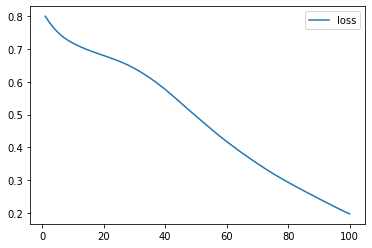

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss over the 100 epochs
history_df.plot(y="loss")

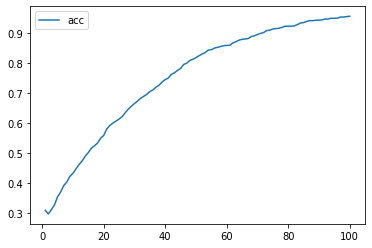

In [15]:
# Plot the accuracy over the 100 epochs
history_df.plot(y="acc")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.1783 - acc: 0.9600
Loss: 0.1783386415243149, Accuracy: 0.9599999785423279


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# Nuances of NN on Nonlinear Numbers

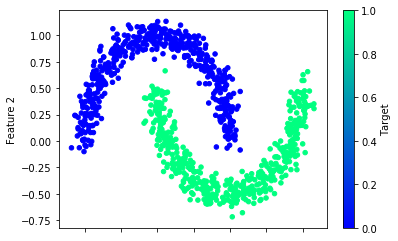

In [19]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [20]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [21]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 61us/sample - loss: 1.8172 - acc: 0.2427
Epoch 2/100
750/750 [==============================] - 0s 59us/sample - loss: 1.5891 - acc: 0.2720
Epoch 3/100
750/750 [==============================] - 0s 61us/sample - loss: 1.4258 - acc: 0.2760
Epoch 4/100
750/750 [==============================] - 0s 63us/sample - loss: 1.3166 - acc: 0.2827
Epoch 5/100
750/750 [==============================] - 0s 63us/sample - loss: 1.2343 - acc: 0.2920
Epoch 6/100
750/750 [==============================] - 0s 58us/sample - loss: 1.1714 - acc: 0.3040
Epoch 7/100
750/750 [==============================] - 0s 67us/sample - loss: 1.1201 - acc: 0.3200
Epoch 8/100
750/750 [==============================] - 0s 60us/sample - loss: 1.0793 - acc: 0.3333
Epoch 9/100
750/750 [==============================] - 0s 61us/sample - loss: 1.0448 - acc: 0.3400
Epoch 10/100
750/750 [==============================] - 0s 58us/sample - loss: 1.0158 - acc: 0.3493
Epoch 11/

Epoch 83/100
750/750 [==============================] - 0s 63us/sample - loss: 0.5710 - acc: 0.6867
Epoch 84/100
750/750 [==============================] - 0s 61us/sample - loss: 0.5688 - acc: 0.6880
Epoch 85/100
750/750 [==============================] - 0s 83us/sample - loss: 0.5666 - acc: 0.6867
Epoch 86/100
750/750 [==============================] - 0s 67us/sample - loss: 0.5645 - acc: 0.6880
Epoch 87/100
750/750 [==============================] - 0s 60us/sample - loss: 0.5624 - acc: 0.6907
Epoch 88/100
750/750 [==============================] - 0s 64us/sample - loss: 0.5602 - acc: 0.6933
Epoch 89/100
750/750 [==============================] - 0s 59us/sample - loss: 0.5582 - acc: 0.6947
Epoch 90/100
750/750 [==============================] - 0s 63us/sample - loss: 0.5560 - acc: 0.6947
Epoch 91/100
750/750 [==============================] - 0s 69us/sample - loss: 0.5541 - acc: 0.6960
Epoch 92/100
750/750 [==============================] - 0s 67us/sample - loss: 0.5519 - acc: 0.6973


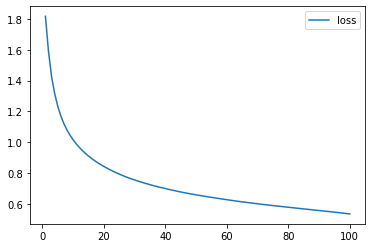

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

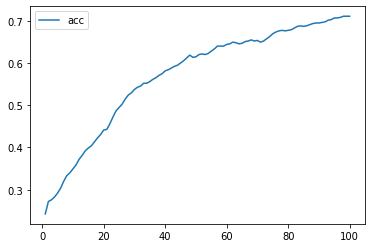

In [23]:
# Plot the loss
history_df.plot(y="acc")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 241us/sample - loss: 0.7104 - acc: 0.4360
Epoch 2/100
750/750 [==============================] - 0s 91us/sample - loss: 0.6782 - acc: 0.6267
Epoch 3/100
750/750 [==============================] - 0s 72us/sample - loss: 0.6504 - acc: 0.6787
Epoch 4/100
750/750 [==============================] - 0s 88us/sample - loss: 0.6264 - acc: 0.7027
Epoch 5/100
750/750 [==============================] - 0s 88us/sample - loss: 0.6046 - acc: 0.7147
Epoch 6/100
750/750 [==============================] - 0s 69us/sample - loss: 0.5848 - acc: 0.7187
Epoch 7/100
750/750 [==============================] - 0s 72us/sample - loss: 0.5666 - acc: 0.7333
Epoch 8/100
750/750 [==============================] - 0s 71us/sample - loss: 0.5493 - acc: 0.7773
Epoch 9/100
750/750 [==============================] - 0s 79us/sample - loss: 0.5324 - acc: 0.8240
Epoch 10/100
750/750 [==============================] - 0s 71us/sample - loss: 0.5155 - acc: 0.8360
Epoch 11

# Bucketing and One-hot encoding practice

In [2]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Fiji               4
Poland             4
Holland            4
Sweden             3
Sarawak            3
Finland            3
Dubai              3
Estonia            2
Ghana              2
United States      1
Nigeria            1
Name: Country, dtype: int64

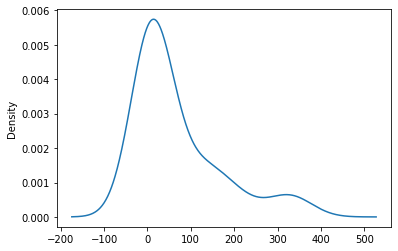

In [4]:
# Visualize the value counts using a density plot
country_counts.plot.density()
# The most common unique values- any country fewer than 100 times = "other"

In [7]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Bucket and Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [8]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
